In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def data_fix(x):
    if isinstance(x,str):
        return float(x.replace("$","").replace(",",""))
    else:
        return x
    
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


In [2]:
degrees = pd.read_csv("./college-salaries/degrees-that-pay-back.csv")

print(degrees.info())

strings = ["Undergraduate Major"]
label = "Undergraduate Major"
test = ["Percent change from Starting to Mid-Career Salary",
        "Mid-Career 10th Percentile Salary","Mid-Career 25th Percentile Salary",
        "Mid-Career 75th Percentile Salary","Mid-Career 90th Percentile Salary"]
x = degrees.drop(strings,axis=1)
#x = degrees[test].copy()
y = degrees[strings].copy()

for attrib in x.columns.values:
    print(attrib)
    x[attrib] = x[attrib].apply(data_fix)

x["1st feature"] = x["Mid-Career Median Salary"]/x["Starting Median Salary"]
x["2nd feature"] = x["Mid-Career 75th Percentile Salary"]/x["Mid-Career 25th Percentile Salary"]
x["3rd feature"] = x["Mid-Career 90th Percentile Salary"]/x["Mid-Career 10th Percentile Salary"]

x = x[["1st feature","2nd feature","3rd feature"]]

print(x.info())

x = num_pipeline.fit_transform(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null object
Mid-Career Median Salary                             50 non-null object
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null object
Mid-Career 25th Percentile Salary                    50 non-null object
Mid-Career 75th Percentile Salary                    50 non-null object
Mid-Career 90th Percentile Salary                    50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB
None
Starting Median Salary
Mid-Career Median Salary
Percent change from Starting to Mid-Career Salary
Mid-Career 10th Percentile Salary
Mid-Career 25th Percentile Salary
Mid-Career 75th Percentile Salary
Mid-Career 90th Percentile Salary
<class 'pandas.core.frame.Data

In [3]:
ctype = pd.read_csv("./college-salaries/salaries-by-college-type.csv")

print(ctype.info())

strings = ["School Type","School Name"]
label = "School Type"
test = ["Starting Median Salary","Mid-Career 10th Percentile Salary","Mid-Career 75th Percentile Salary"]
x = ctype.drop(strings,axis=1)
#x = ctype[test].copy()
y = ctype[strings].copy()

for attrib in x.columns.values:
    print(attrib)
    x[attrib] = x[attrib].apply(data_fix)

x["1st feature"] = x["Mid-Career Median Salary"]/x["Starting Median Salary"]
x["2nd feature"] = x["Mid-Career 75th Percentile Salary"]/x["Mid-Career 25th Percentile Salary"]
x["3rd feature"] = x["Mid-Career 90th Percentile Salary"]/x["Mid-Career 10th Percentile Salary"]

#x = x[["1st feature","2nd feature","3rd feature"]]

print(x.info())

x = num_pipeline.fit_transform(x)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
School Name                          269 non-null object
School Type                          269 non-null object
Starting Median Salary               269 non-null object
Mid-Career Median Salary             269 non-null object
Mid-Career 10th Percentile Salary    231 non-null object
Mid-Career 25th Percentile Salary    269 non-null object
Mid-Career 75th Percentile Salary    269 non-null object
Mid-Career 90th Percentile Salary    231 non-null object
dtypes: object(8)
memory usage: 16.9+ KB
None
Starting Median Salary
Mid-Career Median Salary
Mid-Career 10th Percentile Salary
Mid-Career 25th Percentile Salary
Mid-Career 75th Percentile Salary
Mid-Career 90th Percentile Salary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
Starting Median Salary               269 non-null float64
Mid-Career Median Salary             269 non-nul

In [12]:
region = pd.read_csv("./college-salaries/salaries-by-region.csv")

print(region.info())

strings = ["School Name","Region"]
label = "Region"
test = ["Starting Median Salary","Mid-Career 10th Percentile Salary","Mid-Career 75th Percentile Salary"]
x = region.drop(strings,axis=1)
#x = region[test].copy()
y = region[strings].copy()

for attrib in x.columns.values:
    print(attrib)
    x[attrib] = x[attrib].apply(data_fix)
    
print(x.info())

x = num_pipeline.fit_transform(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
dtypes: object(8)
memory usage: 20.1+ KB
None
Starting Median Salary
Mid-Career Median Salary
Mid-Career 10th Percentile Salary
Mid-Career 25th Percentile Salary
Mid-Career 75th Percentile Salary
Mid-Career 90th Percentile Salary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
Starting Median Salary               320 non-null float64
Mid-Career Median Salary             320 non-nul

Cluster 0
  Massachusetts Institute of Technology (MIT)
  California Institute of Technology (CIT)
  Harvey Mudd College
  Polytechnic University of New York, Brooklyn
  Cooper Union
  Worcester Polytechnic Institute (WPI)
  Carnegie Mellon University (CMU)
  Rensselaer Polytechnic Institute (RPI)
  Georgia Institute of Technology
  Colorado School of Mines
  Stevens Institute of Technology
  Illinois Institute of Technology (IIT)
  Wentworth Institute of Technology
  South Dakota School of Mines & Technology
  Lafayette College
  Cornell University
  University of California, Berkeley
  Cal Poly San Luis Obispo
  University of Missouri - Rolla (UMR)
Cluster 1
  Bucknell University
  Colgate University
  Dartmouth College
  Princeton University
  Yale University
  Harvard University
  University of Pennsylvania
  Brown University
  Columbia University
Cluster 2
  Embry-Riddle Aeronautical University (ERAU)
  Tennessee Technological University
  West Virginia University (WVU)
  Universi

NameError: name 'markers' is not defined

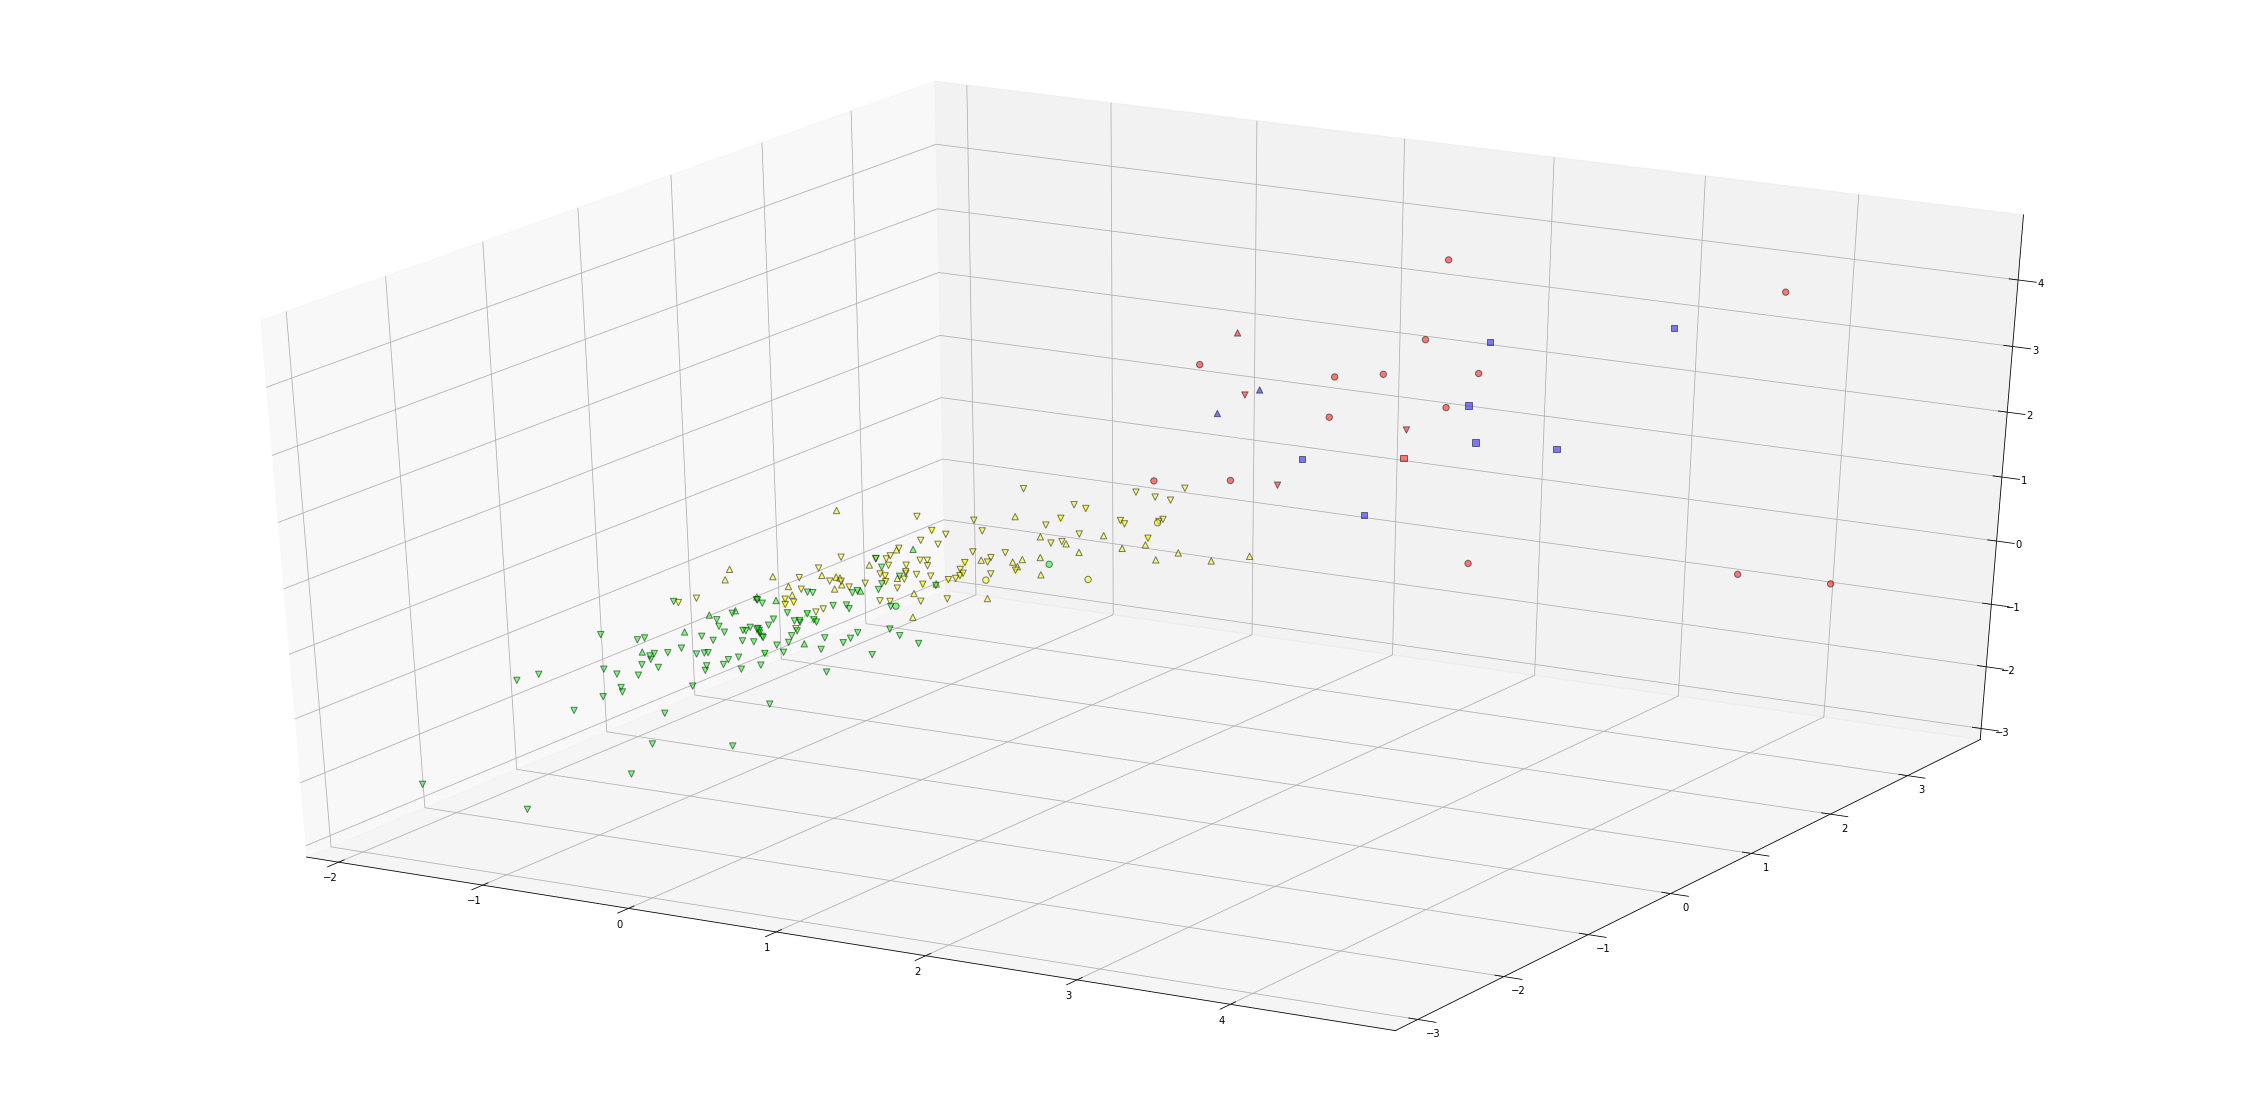

In [4]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

#print(kmeans.cluster_centers_)
#print(y_pred)

#for i in range(0,k):
 #   print(i)
  #  for j in range(0,len(y)):
   #     if y_pred[j] == i:
    #        print("  "+y[label][j])

#print(list(y[label]))

d = {0:"#ff0000", 1:"#00ff00", 2:"#0000ff", 3:"#ffff00", 4:"#ff00ff", 5:"#ffff00", 6:"#ffffff", 7:"#000000"}

output = []
for alpha in range(0,k):
    output.append([])
for alpha,beta in zip(y_pred,y["School Name"]):
    output[alpha].append(beta)
temp = output[2]
output[2] = output[1]
output[1] = temp
for alpha in range(0,len(output)):
    print("Cluster "+str(alpha))
    print("  ",end="")
    print("\n  ".join(output[alpha]))

fig = plt.figure(figsize=(40,20))
ax = fig.add_subplot(111, projection='3d')

from itertools import compress

fil = y['School Type'] == 'Engineering'
x_eng = np.array(list(compress(x, fil)))
y_pred_eng = np.array(list(compress(y_pred, fil)))
colors_eng = np.array([d[q] for q in y_pred_eng])

fil = y['School Type'] == 'Ivy League'
x_ivy = np.array(list(compress(x, fil)))
y_pred_ivy = np.array(list(compress(y_pred, fil)))
colors_ivy = np.array([d[q] for q in y_pred_ivy])

fil = y['School Type'] == 'State'
x_state = np.array(list(compress(x, fil)))
y_pred_state = np.array(list(compress(y_pred, fil)))
colors_state = np.array([d[q] for q in y_pred_state])

fil = y['School Type'] == 'Liberal Arts'
x_la = np.array(list(compress(x, fil)))
y_pred_la = np.array(list(compress(y_pred, fil)))
colors_la = np.array([d[q] for q in y_pred_la])

fil = y['School Type'] == 'Party'
x_party = np.array(list(compress(x, fil)))
y_pred_party = np.array(list(compress(y_pred, fil)))
colors_party = np.array([d[q] for q in y_pred_party])

ax.scatter(x_eng[:,0], x_eng[:,1], x_eng[:,2], c=colors_eng, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='o')
ax.scatter(x_ivy[:,0], x_ivy[:,1], x_ivy[:,2], c=colors_ivy, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='s')
ax.scatter(x_state[:,0], x_state[:,1], x_state[:,2], c=colors_state, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='v')
ax.scatter(x_la[:,0], x_la[:,1], x_la[:,2], c=colors_la, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='^')
ax.scatter(x_party[:,0], x_party[:,1], x_party[:,2], c=colors_party, cmap='viridis', edgecolor='k', s=40, alpha = 0.5, marker='x')

ax.set_title("School types based on salary data")
ax.set_xlabel("Starting Median Salary")
ax.set_ylabel("Mid-Career Median Salary")
ax.set_zlabel("Mid-Career 10th Percentile Salary")
ax.dist = 10

colors_cluster = np.array([d[q] for q in range(0,k)])
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           kmeans.cluster_centers_[:,2], 
           s = 300, c = colors_cluster, marker='*', label = 'Centroid', alpha=0.5)

plt.autoscale(enable=True, axis='x', tight=True)    


In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))